# Plot Templates

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import scipy.stats as stats

# Import seaborn and apply its plotting styles
import seaborn as sns

In [2]:
df = pd.read_csv('df_for_viz.csv')
df.head()

,gender,lecture_attendance,job,statistics,programming,Java,MATLAB,R,Python,C,SQL
0,female,I prefer to attend lecture,No,5,8,1,0,0,0,0,0
1,male,I prefer to attend lecture,No,8,4,0,1,0,1,0,0
2,female,I prefer to attend lecture,No,6,7,1,0,0,0,0,0
3,male,I prefer to attend lecture,No,2,10,1,0,0,0,1,0
4,male,I prefer not to attend lecture (i.e. catch up ...,Yes,3,10,1,0,0,0,0,0


## Histogram & Density plot

### Basic Histogram with Pandas

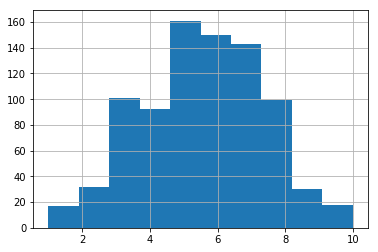

In [3]:
# Basic looking histogram
df['statistics'].hist(bins=10)

### Seaborn Histograms

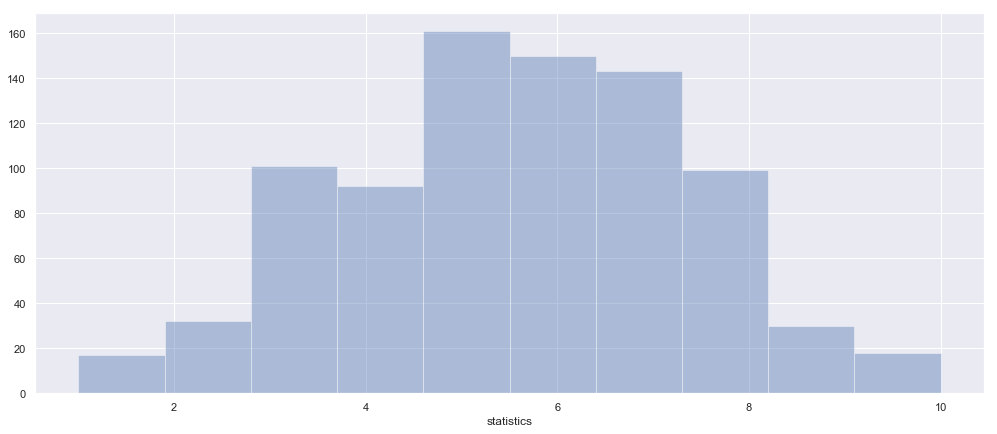

In [7]:
# Fancier histogram with seaborn

# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7) #default plot size to output

sns.set()
sns.distplot(df['statistics'], kde=False, bins=10)

In [8]:
# Customize font and background color
sns.set(font_scale=2.5, style="white")

Text(0.5,0,'How comfortable are you with statistics?')

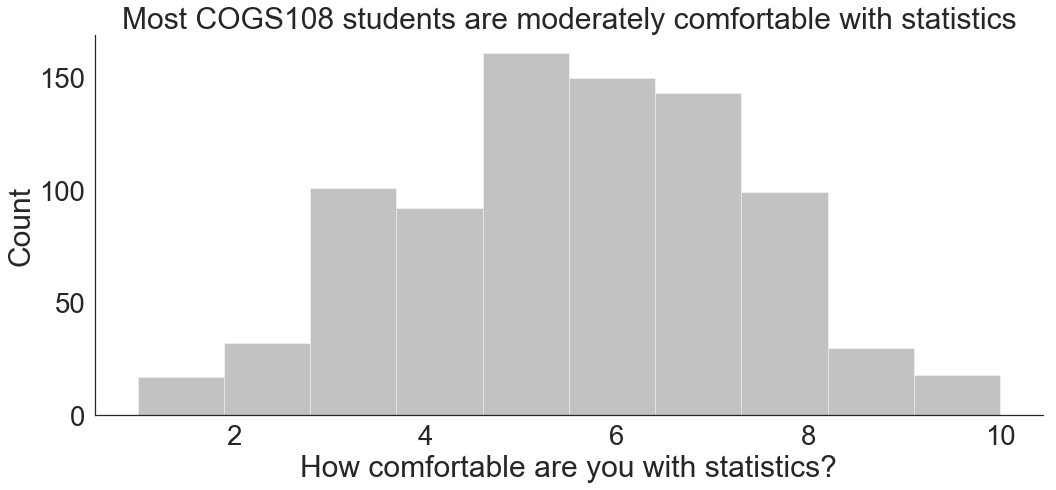

In [13]:
# change bar color to dark grey
ax = sns.distplot(df['statistics'], kde=False, 
                  bins=10, color = '#686868')

# remove the top and right lines
sns.despine()

# add title and axis labels (modify x-axis label)
ax.set_title('Most COGS108 students are moderately comfortable with statistics')
ax.set_ylabel('Count')
ax.set_xlabel('How comfortable are you with statistics?')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


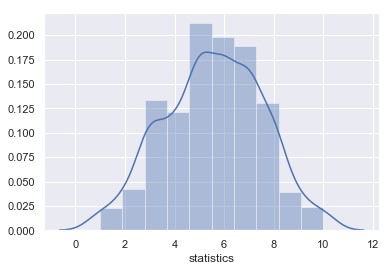

In [22]:
# Change plots back to default setting
sns.set(font_scale=1)
plt.rcParams['figure.figsize'] = (6, 4)

# Histogram with density plot
sns.distplot(df['statistics'], bins=10)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


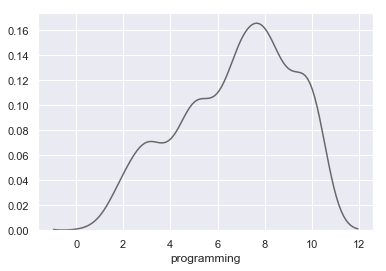

In [23]:
# specify hist=False to only display the densityplot
sns.distplot(df['programming'], hist=False, color = '#686868')

### Fit with Normal Density Plot

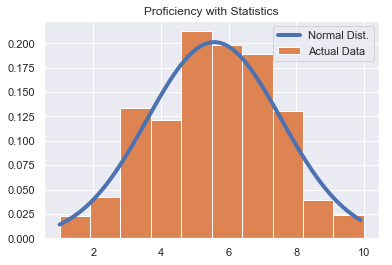

In [28]:
# Plot with Normal distribution fit line
s = df['statistics'].values
xs = np.arange(s.min(), s.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(s), np.std(s))
plt.plot(xs, fit, label='Normal Dist.', lw=4)
plt.hist(s, density=True, label='Actual Data')
plt.title('Proficiency with Statistics')
plt.legend()

## Barplots

### Basic Pandas Barplot

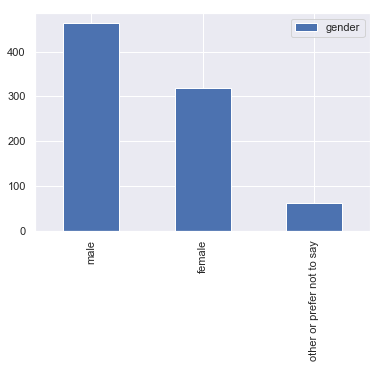

In [29]:
# Barplots with plot() in pandas
value_counts = df['gender'].value_counts()
df_gender = pd.DataFrame([value_counts])
df_gender.transpose().plot(kind='bar')

### Seaborn barplots

Text(0.5,0,'Gender')

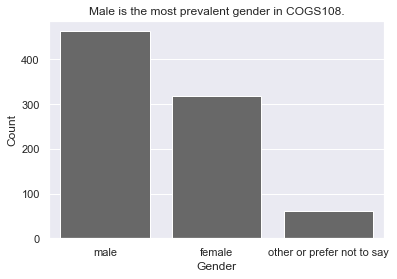

In [30]:
# Fancier seaborn barplot with bar ordering
sns.countplot(x='gender', data=df, color = "#686868",
             order = ["male", "female", "other or prefer not to say"])
ax = plt.gca()

# add title and axis labels (modify x-axis label)
ax.set_title('Male is the most prevalent gender in COGS108.')
ax.set_ylabel('Count')
ax.set_xlabel('Gender')

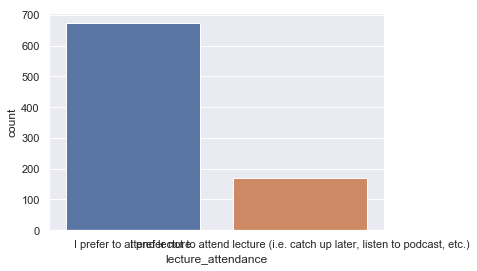

In [31]:
# default bar plot with seaborn
sns.countplot(x='lecture_attendance', data=df);

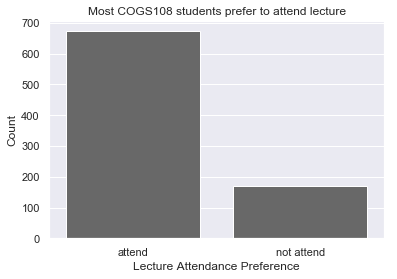

In [32]:
sns.countplot(x='lecture_attendance', data=df, color = "#686868")
ax = plt.gca()

# add title and axis labels (modify x-axis label)
ax.set_title('Most COGS108 students prefer to attend lecture')
ax.set_ylabel('Count')
ax.set_xlabel('Lecture Attendance Preference')
# set tick labels to REPLACE DEFAULT LABELS (which is obviously too long)
ax.set_xticklabels(("attend", "not attend"));

### Grouped Barplot with Seaborn

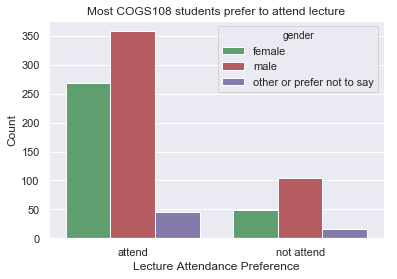

In [34]:
# control color palette
unique = df["lecture_attendance"].append(df["gender"]).unique()
palette = dict(zip(unique, sns.color_palette()))

# generate grouped barplot by specifying hue
sns.countplot(x='lecture_attendance', hue = 'gender', 
              data=df, palette = palette)
ax = plt.gca()

# add title and axis labels (modify x-axis label)
ax.set_title('Most COGS108 students prefer to attend lecture')
ax.set_ylabel('Count')
ax.set_xlabel('Lecture Attendance Preference')
ax.set_xticklabels(('attend', 'not attend'));

### Stacked Barplot with Pandas

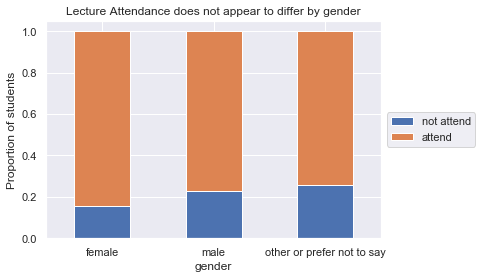

In [36]:
df2 = df.groupby([ 'lecture_attendance','gender'])['lecture_attendance'].count().unstack('gender').fillna(0)
sub_df2 = np.transpose(df2.div(df2.sum()))
sub_df2.plot(kind='bar', stacked=True, rot=0)
plt.legend(('not attend','attend'), loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Lecture Attendance does not appear to differ by gender')
plt.ylabel('Proportion of students');

## Boxplots

### Basic Boxplot with Seaborn

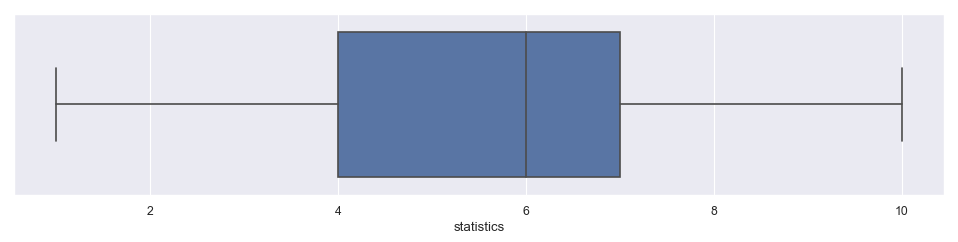

In [38]:
# controlling how this plot displays (background white, edge black)
fig=plt.figure(figsize=(15, 3), dpi= 80, facecolor='w', edgecolor='k')

# generate boxplots
sns.boxplot(x='statistics', data=df);

### Side-by-Side Boxplots

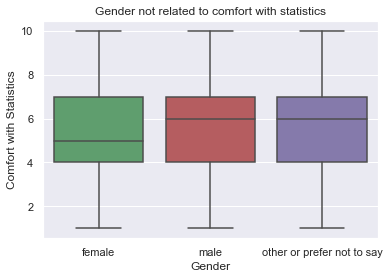

In [39]:
# generate boxplotsa
# we can make sure the colors match what we used earlier for the same groups
sns.boxplot(x='gender', y='statistics', data=df, palette=palette)
ax = plt.gca()
ax.set_title('Gender not related to comfort with statistics')
ax.set_ylabel('Comfort with Statistics')
ax.set_xlabel('Gender');

## Scatter plot

### Basic Scatter plot

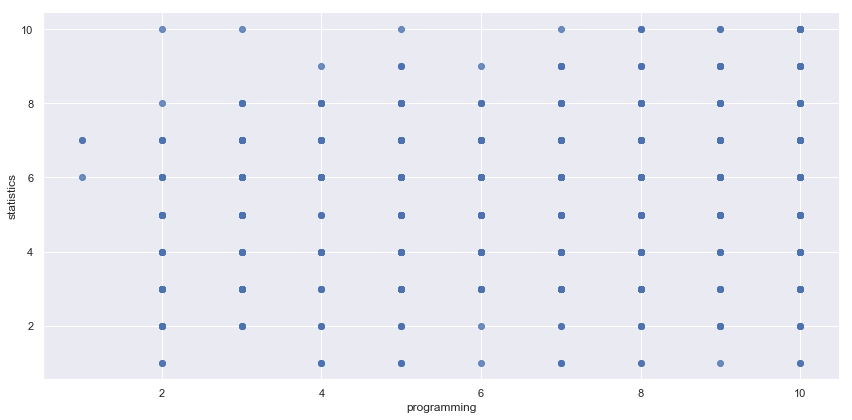

In [40]:
sns.lmplot(x='programming', y='statistics', data=df, 
           fit_reg=False, height=6, aspect=2);

# alternative with pandas
#df.plot.scatter('programming', 'statistics');

Text(0.5,1,'No obvious relationship between students programming & stats comfortability')

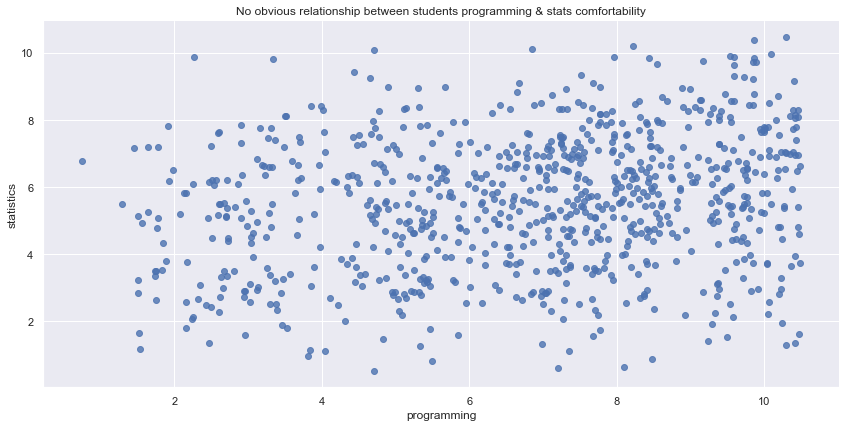

In [41]:
# jitter points to see relationship
sns.lmplot(x='programming', y='statistics', data=df, 
           fit_reg=False, height=6, aspect=2, 
           x_jitter=.5, y_jitter=.5)
# customize title
ax = plt.gca()
ax.set_title('No obvious relationship between students programming & stats comfortability')

### Scatter plot with Linear Regression Line

Text(0.5,1,'No obvious relationship between students programming & stats comfortability')

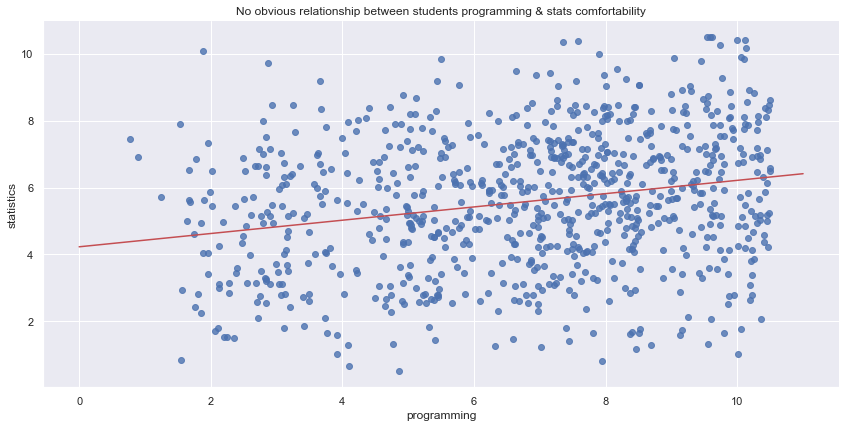

In [48]:
# 1-degree linear model from polyfit
a1, b1 = np.polyfit(df['programming'].tolist(), df['statistics'].tolist(), 1)

# jitter points to see relationship
sns.lmplot(x='programming', y='statistics', data=df, 
           fit_reg=False, height=6, aspect=2, 
           x_jitter=.5, y_jitter=.5)

x = np.arange(0, 12) # range of the regression line
plt.plot(x, a1 * x + b1, '-', color='r') # Plot red linear regression line

# customize title
ax = plt.gca()
ax.set_title('No obvious relationship between students programming & stats comfortability')

### Scatter plot by Categorical Variables

Text(0.5,1,'No obvious relationship between students programming & stats comfortability')

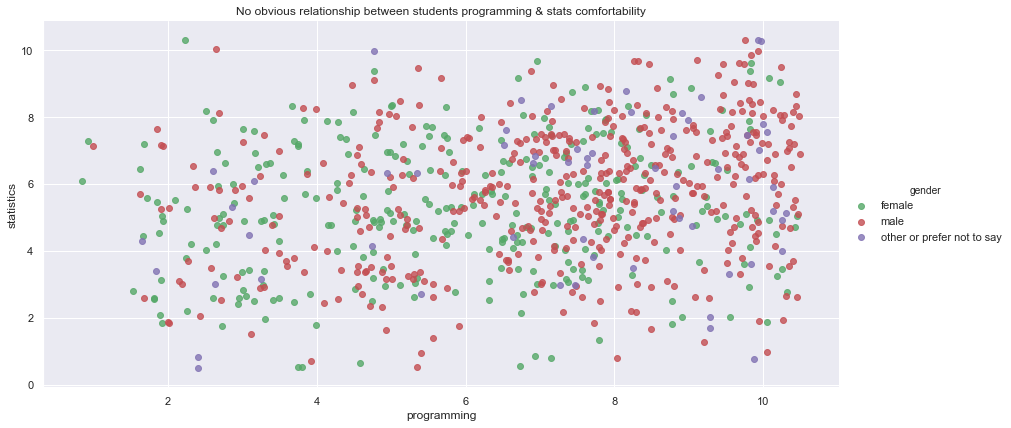

In [49]:
# color points by gender is
sns.lmplot(x='programming', y='statistics', data=df, hue='gender',
           fit_reg=False, height=6, aspect=2, 
           x_jitter=.5, y_jitter=.5,
           palette=palette)

# customize title
ax = plt.gca()
ax.set_title('No obvious relationship between students programming & stats comfortability')

### Scatter Matrix from Pandas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ec3b128>,
      dtype=object)

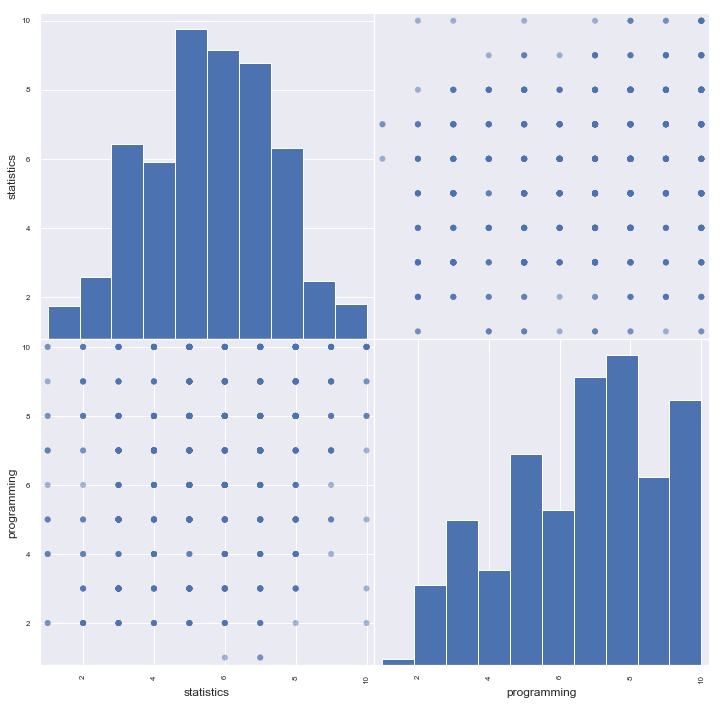

In [50]:
pd.plotting.scatter_matrix(df[['statistics', 'programming']], figsize=[12, 12], marker=12)